<a href="https://colab.research.google.com/github/imraunav/pattern-recognition/blob/main/pra1q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#fetching files
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/l_class1.txt"
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/l_class2.txt"
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/l_class3.txt"
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/nl_class1.txt"
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/nl_class2.txt"
!wget = "https://raw.githubusercontent.com/imraunav/pattern-recognition/main/nl_class3.txt"


--2022-10-09 16:36:03--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-10-09 16:36:03--  https://raw.githubusercontent.com/imraunav/pattern-recognition/main/l_class1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7399 (7.2K) [text/plain]
Saving to: ‘l_class1.txt’

l_class1.txt        100%[===================>]   7.23K  --.-KB/s    in 0s      

2022-10-09 16:36:04 (91.9 MB/s) - ‘l_class1.txt’ saved [7399/7399]

FINISHED --2022-10-09 16:36:04--
Total wall clock time: 0.1s
Downloaded: 1 files, 7.2K in 0s (91.9 MB/s)
--2022-10-09 16:36:04--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-10-09 16:36:04--  https://raw.githubuserc

# Importing Datasets

In [ ]:
path = '' #edit this to add files from some directory
with open(path + 'l_class1.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_1_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)

with open(path + 'l_class2.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_2_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_2_features)

with open(path + 'l_class3.txt', mode = 'r') as file:
    file_data = file.read()
    l_class_3_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_3_features)

In [ ]:
with open(path + 'nl_class1.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_1_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)
with open(path + 'nl_class2.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_2_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)
with open(path + 'nl_class3.txt', mode = 'r') as file:
    file_data = file.read()
    nl_class_3_features = np.array([list(map(float, x.split())) for x in file_data.splitlines()])
# print(class_1_features)

# Some definations and calculation functions

In [ ]:
dpi = 150 #increasing this value increases computation time, be careful
cmap = 'rainbow' #color scheme of contour plot
alpha = 0.5 #brightness of contour plot
figures = [] #list for downloading plots

In [ ]:
# multivariate class conditional density function 
def gaussian_ccd(x_, mean_, cov_m):
    x = np.reshape(x_, newshape = (2, 1)) #converting to column vector
    mean = np.reshape(mean_, newshape = (2, 1)) #converting to column vector
    inv_cov_m = np.linalg.inv(cov_m)
    det_cov_m = np.linalg.det(cov_m)
    ex = np.exp(-0.5 * np.matmul((x - mean).T, np.matmul(inv_cov_m, (x - mean))))
    return (1/(((2 * np.pi) ** (len(x)/2)) * det_cov_m**0.5)) * ex

In [ ]:
def coordinates(data): #feature set to coordinates
    return [x for x, y in data], [y for x, y in data]

In [ ]:
def class_divider(features, gt):
    class1 = [x for i, x in enumerate(features) if gt[i] == 1]
    class2 = [x for i, x in enumerate(features) if gt[i] == 2]
    class3 = [x for i, x in enumerate(features) if gt[i] == 3]
    return class1, class2, class3

In [ ]:
def confusion_mat(pred, actual):
    conf_mat = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
    for i in range(len(pred)):
      # conf_mat[pred[i] -1][actual[i]-1] += 1 # avoid using this to catch error
        #pred class 1
        if pred[i] == 1 and actual[i] == 1:
            conf_mat[0][0] += 1
        elif pred[i] == 1 and actual[i] == 2:
            conf_mat[0][1] += 1
        elif pred[i] == 1 and actual[i] == 3:
            conf_mat[0][2] += 1
        # pred class 2
        elif pred[i] == 2 and actual[i] == 1:
            conf_mat[1][0] += 1
        elif pred[i] == 2 and actual[i] == 2:
            conf_mat[1][1] += 1
        elif pred[i] == 2 and actual[i] == 3:
            conf_mat[1][2] += 1
        #pred class 3
        elif pred[i] == 3 and actual[i] == 1:
            conf_mat[2][0] += 1
        elif pred[i] == 3 and actual[i] == 2:
            conf_mat[2][1] += 1
        elif pred[i] == 3 and actual[i] == 3:
            conf_mat[2][2] += 1
    
    return conf_mat

In [ ]:
def accuracy(conf_mat):
    correct_pred = conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2]
    total_pred = np.sum(conf_mat)
    return correct_pred/750#total_pred

In [ ]:
def precision(conf_mat):
    prec_1 = conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1] + conf_mat[0][2])
    prec_2 = conf_mat[1][1]/(conf_mat[1][0] + conf_mat[1][1] + conf_mat[1][2])
    prec_3 = conf_mat[2][2]/(conf_mat[2][2] + conf_mat[2][1] + conf_mat[2][0])
    return (prec_1 + prec_2 + prec_3) / 3

In [ ]:
def recall(conf_mat):
    r_1 = conf_mat[0][0] / (conf_mat[0][0]+ conf_mat[1][0] + conf_mat[2][0])
    r_2 = conf_mat[1][1] / (conf_mat[1][1]+ conf_mat[0][1] + conf_mat[2][1])
    r_3 = conf_mat[2][2] / (conf_mat[2][2]+ conf_mat[0][2] + conf_mat[1][2])
    return (r_1 + r_2 + r_3) / 3

In [ ]:
def f_score(conf_mat):
  return 2/(1/precision(conf_mat) + 1/recall(conf_mat))

In [ ]:
def performance(pred, actual):
  conf_mat = confusion_mat(pred, actual)
  accu = accuracy(conf_mat)
  prec = precision(conf_mat)
  rec = recall(conf_mat)
  f_sco = f_score(conf_mat)
  return accu, prec, rec, f_sco

In [ ]:
def classifier(feature_vectors, mean_set, cov_set, priors):
  # ignoring evidance for comparison
  pred = []
  for x in feature_vectors:
    posteriors = []
    for i in range(3):
      likelihood = gaussian_ccd(x, mean_set[i], cov_set[i])
      posteriors.append(np.log(likelihood) + np.log(priors[i]))
    pred_class = np.argmax(posteriors)
    pred.append(pred_class + 1)
  return pred

# Data splitting

In [ ]:
# np.random.shuffle(l_class_1_features)
l_class_1_train = l_class_1_features[ : len(l_class_1_features)//2]
l_class_1_test = l_class_1_features[len(l_class_1_features)//2 : ]
# np.random.shuffle(l_class_2_features)
l_class_2_train = l_class_2_features[ : len(l_class_2_features)//2]
l_class_2_test = l_class_2_features[len(l_class_2_features)//2 : ]
# np.random.shuffle(l_class_3_features)
l_class_3_train = l_class_3_features[ : len(l_class_3_features)//2]
l_class_3_test = l_class_3_features[len(l_class_3_features)//2 : ]

# np.random.shuffle(nl_class_1_features)
nl_class_1_train = nl_class_1_features[ : len(nl_class_1_features)//2]
nl_class_1_test = nl_class_1_features[len(nl_class_1_features)//2 : ]
# np.random.shuffle(nl_class_2_features)
nl_class_2_train = nl_class_2_features[ : len(nl_class_2_features)//2]
nl_class_2_test = nl_class_2_features[len(nl_class_2_features)//2 : ]
# np.random.shuffle(nl_class_3_features)
nl_class_3_train = nl_class_3_features[ : len(nl_class_3_features)//2]
nl_class_3_test = nl_class_3_features[len(nl_class_3_features)//2 : ]

In [ ]:
l_class_1_x, l_class_1_y = coordinates(l_class_1_train)
l_class_2_x, l_class_2_y = coordinates(l_class_2_train)
l_class_3_x, l_class_3_y = coordinates(l_class_3_train)

nl_class_1_x, nl_class_1_y = coordinates(nl_class_1_train)
nl_class_2_x, nl_class_2_y = coordinates(nl_class_2_train)
nl_class_3_x, nl_class_3_y = coordinates(nl_class_3_train)

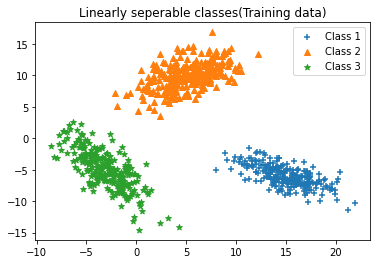

In [ ]:
plt.scatter(l_class_1_x, l_class_1_y, label = "Class 1", marker = '+')
plt.scatter(l_class_2_x, l_class_2_y, label = 'Class 2', marker = '^')
plt.scatter(l_class_3_x, l_class_3_y, label = 'Class 3', marker = '*')
plt.title('Linearly seperable classes(Training data)')
# figures.append('train_l.png')
# plt.savefig(figures[-1], dpi = 350)
plt.legend()
plt.show()

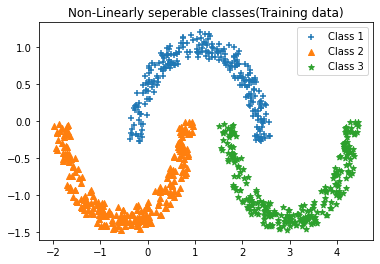

In [ ]:
plt.scatter(nl_class_1_x, nl_class_1_y, label = "Class 1", marker = '+')
plt.scatter(nl_class_2_x, nl_class_2_y, label = 'Class 2', marker = '^')
plt.scatter(nl_class_3_x, nl_class_3_y, label = 'Class 3', marker = '*')
plt.title('Non-Linearly seperable classes(Training data)')
# figures.append('train_nl.png')
# plt.savefig(figures[-1], dpi = 350)
plt.legend()
plt.show()

### Ground truth for test data

In [ ]:
gt_l = [1]*len(l_class_1_test) + [2]*len(l_class_2_test) + [3]*len(l_class_3_test)
test_features_l = np.concatenate((l_class_1_test, l_class_2_test, l_class_3_test))

gt_nl = [1]*len(nl_class_1_test) + [2]*len(nl_class_2_test) + [3]*len(nl_class_3_test)
test_features_nl = np.concatenate((nl_class_1_test, nl_class_2_test, nl_class_3_test))

### Some constants from data

In [ ]:
means_l = [np.mean(l_class_1_train, axis = 0), np.mean(l_class_2_train, axis = 0), np.mean(l_class_3_train, axis = 0)]
means_nl = [np.mean(nl_class_1_train, axis = 0), np.mean(nl_class_2_train, axis = 0), np.mean(nl_class_3_train, axis = 0)]

priors_l = [gt_l.count(1)/len(gt_l), gt_l.count(2)/len(gt_l), gt_l.count(3)/len(gt_l)]
priors_nl = [gt_nl.count(1)/len(gt_nl), gt_nl.count(2)/len(gt_nl), gt_nl.count(3)/len(gt_nl)]


# Bayes classifers

## Linearly seperable features

### Classifier 1
C1: Covariance for all classes is $\sigma^{2}I$. Use the average of the sample variances for all dimensions, for all classes, from the training data as $\sigma^{2}$.

In [ ]:
var_class_1 = np.var(l_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(l_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(l_class_3_train, axis = 0, dtype = np.float64)
# print(var_class_1, var_class_2, var_class_3)
avg_var = (var_class_1 + var_class_2 + var_class_3) / 3
avg_cov = np.identity(2)* avg_var
print(f'Covariance matrix =\n{avg_cov}')
cov_classifier_1 = [avg_cov, avg_cov, avg_cov]

Covariance matrix =
[[5.77034986 0.        ]
 [0.         5.76251899]]


In [ ]:
#for linear data

pred_l_classifier_1 = classifier(test_features_l, means_l, cov_classifier_1, priors_l)
confusion_matrix_classifier_1 = confusion_mat(pred_l_classifier_1, gt_l)

performance_1 = performance(pred_l_classifier_1, gt_l)
print(f'Confusion matrix =\n{confusion_matrix_classifier_1}')
print(f'Classifier performance for linearly seperable dataset\nAccuracy = {performance_1[0]}\nPrecision = {performance_1[1]}\nRecall = {performance_1[2]}\nF-Score = {performance_1[3]}')


Confusion matrix =
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier performance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
#contour points
class_x1, class_y1 = coordinates(l_class_1_test)
class_x2, class_y2 = coordinates(l_class_2_test)
class_x3, class_y3 = coordinates(l_class_3_test)

min_x = min([min(class_x1), min(class_x2), min(class_x3)])
max_x = max([max(class_x1), max(class_x2), max(class_x3)])

min_y = min([min(class_y1), min(class_y2), min(class_y3)])
max_y = max([max(class_y1), max(class_y2), max(class_y3)])

mesh_x, mesh_y = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
mesh_features_x = np.array([[x, 0] for x in mesh_x.ravel()])
mesh_features_y = np.array([[0, y] for y in mesh_y.ravel()])
mesh_features = mesh_features_x + mesh_features_y

min_x, max_x, min_y, max_y

(-9.3855, 21.459, -13.225, 16.217)

In [ ]:
mesh_z = np.array(classifier(mesh_features, means_l, cov_classifier_1, priors_l))
mesh_z = mesh_z.reshape(mesh_x.shape)

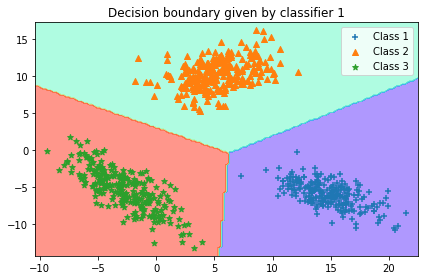

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 1')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c1_l.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')
plt.show()

### Classifier 2
C2: Full but equal covariance for all classes, $\Sigma$. Use the average of the sample covariance matrix from all classes in the train data as $\Sigma$.

In [ ]:
cov_class_1 = np.cov(l_class_1_train.T)
cov_class_2 = np.cov(l_class_2_train.T)
cov_class_3 = np.cov(l_class_3_train.T)

avg_cov_2 = (cov_class_1 + cov_class_2 + cov_class_3) / 3
print(f'Covariance matrix =\n{avg_cov_2}')
cov_classifier_2 = [avg_cov_2]*3

Covariance matrix =
[[ 5.79352396 -1.59399547]
 [-1.59399547  5.78566164]]


In [ ]:
#for linear data

pred_l_classifier_2 = classifier(test_features_l, means_l, cov_classifier_2, priors_l)

confusion_matrix_classifier_2 = confusion_mat(pred_l_classifier_2, gt_l)

performance_2 = performance(pred_l_classifier_2, gt_l)
print(f'Confusion matrix = \n{confusion_matrix_classifier_2}')
print(f'Classifier performance for linearly seperable dataset\nAccuracy = {performance_2[0]}\nPrecision = {performance_2[1]}\nRecall = {performance_2[2]}\nF-Score = {performance_2[3]}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier performance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_l, cov_classifier_2, priors_l))
mesh_z = mesh_z.reshape(mesh_x.shape)

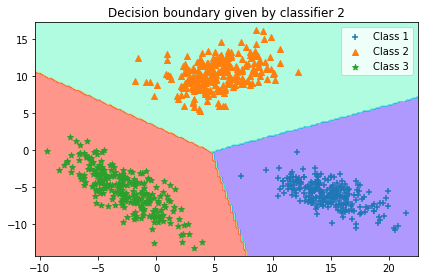

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 2')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c2_l.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Classifier 3
C3: Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class.

In [ ]:
var_class_1 = np.var(l_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(l_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(l_class_3_train, axis = 0, dtype = np.float64)

cov_classifier_3 = [np.identity(2)* var_class_1, np.identity(2)* var_class_2, np.identity(2)* var_class_3]
print(f'Class 1 Covariance matrix =\n{cov_classifier_3[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_3[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_3[2]}\n')

Class 1 Covariance matrix =
[[6.02755383 0.        ]
 [0.         2.77801584]]

Class 2 Covariance matrix =
[[6.49502067 0.        ]
 [0.         4.77123273]]

Class 3 Covariance matrix =
[[4.78847509 0.        ]
 [0.         9.7383084 ]]



In [ ]:
#for linear data

pred_l_classifier_3 = classifier(test_features_l, means_l, cov_classifier_3, priors_l)

confusion_matrix_classifier_3 = confusion_mat(pred_l_classifier_3, gt_l)

performance_3 = performance(pred_l_classifier_3, gt_l)
print(f'Confusion matrix = \n{confusion_matrix_classifier_3}')
print(f'Classifier performance for linearly seperable dataset\nAccuracy = {performance_3[0]}\nPrecision = {performance_3[1]}\nRecall = {performance_3[2]}\nF-Score = {performance_3[3]}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier performance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_l, cov_classifier_3, priors_l))
mesh_z = mesh_z.reshape(mesh_x.shape)

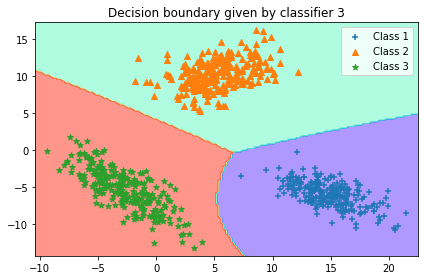

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 3')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c3_l.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Classifier 4
C4: Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.

In [ ]:
cov_class_1 = np.cov(l_class_1_train.T)
cov_class_2 = np.cov(l_class_2_train.T)
cov_class_3 = np.cov(l_class_3_train.T)

cov_classifier_4 = (cov_class_1, cov_class_2, cov_class_3)
print(f'Class 1 Covariance matrix =\n{cov_classifier_4[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_4[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_4[2]}\n')

Class 1 Covariance matrix =
[[ 6.05176087 -2.65004037]
 [-2.65004037  2.78917253]]

Class 2 Covariance matrix =
[[6.52110509 2.94634999]
 [2.94634999 4.79039431]]

Class 3 Covariance matrix =
[[ 4.80770592 -5.07829604]
 [-5.07829604  9.77741807]]



In [ ]:
#for linear data

pred_l_classifier_4 = classifier(test_features_l, means_l, cov_classifier_4, priors_l)

confusion_matrix_classifier_4 = confusion_mat(pred_l_classifier_4, gt_l)

performance_4 = performance(pred_l_classifier_4, gt_l)
print(f'Confusion matrix = \n{confusion_matrix_classifier_4}')
print(f'Classifier performance for linearly seperable dataset\nAccuracy = {performance_4[0]}\nPrecision = {performance_4[1]}\nRecall = {performance_4[2]}\nF-Score = {performance_4[3]}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier performance for linearly seperable dataset
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F-Score = 1.0


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_l, cov_classifier_4, priors_l))
mesh_z = mesh_z.reshape(mesh_x.shape)

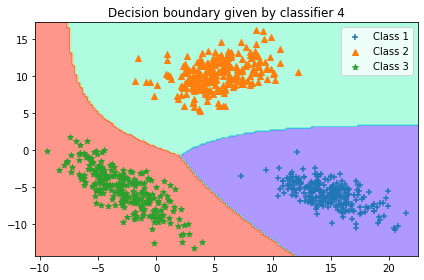

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 4')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c4_l.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Performance of classifier
Summary pf the classifier performance

In [ ]:
print('Classifier', 'Acc.', 'Prec.', 'Recall', 'F-score', sep = '\t|')
print('C1\t', f'{performance_1[0]: .3f}', f'{performance_1[1]: .3f}', f'{performance_1[2]: .3f}', f'{performance_1[3]: .3f}', sep = '\t|')
print('C2\t', f'{performance_2[0]: .3f}', f'{performance_2[1]: .3f}', f'{performance_2[2]: .3f}', f'{performance_2[3]: .3f}', sep = '\t|')
print('C3\t', f'{performance_3[0]: .3f}', f'{performance_3[1]: .3f}', f'{performance_3[2]: .3f}', f'{performance_3[3]: .3f}', sep = '\t|')
print('C4\t', f'{performance_4[0]: .3f}', f'{performance_4[1]: .3f}', f'{performance_4[2]: .3f}', f'{performance_4[3]: .3f}', sep = '\t|')

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 1.000	| 1.000	| 1.000	| 1.000
C2		| 1.000	| 1.000	| 1.000	| 1.000
C3		| 1.000	| 1.000	| 1.000	| 1.000
C4		| 1.000	| 1.000	| 1.000	| 1.000


## Non-linearly seperable features

### Classifier 1
C1: Covariance for all classes is $\sigma^{2}I$. Use the average of the sample variances for all dimensions, for all classes, from the training data as $\sigma^{2}$.

In [ ]:
var_class_1 = np.var(nl_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(nl_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(nl_class_3_train, axis = 0, dtype = np.float64)

avg_var = (var_class_1 + var_class_2 + var_class_3) / 3
avg_cov = np.identity(2)* avg_var
print(f'Covariance matrix =\n{avg_cov}')
cov_classifier_1 = [avg_cov]*3

Covariance matrix =
[[0.85301628 0.        ]
 [0.         0.18197072]]


In [ ]:
#for non-linear data

pred_nl_classifier_1 = classifier(test_features_nl, means_nl, cov_classifier_1, priors_nl)

confusion_matrix_classifier_1 = confusion_mat(pred_nl_classifier_1, gt_nl)

performance_1 = performance(pred_nl_classifier_1, gt_nl)
print(f'Confusion matrix =\n{confusion_matrix_classifier_1}')
print(f'Classifier performance for non-linearly seperable dataset\nAccuracy = {performance_1[0]}\nPrecision = {performance_1[1]}\nRecall = {performance_1[2]}\nF-Score = {performance_1[3]}')


Confusion matrix =
[[222  16  22]
 [ 14 234   0]
 [ 14   0 228]]
Classifier performance for non-linearly seperable dataset
Accuracy = 0.912
Precision = 0.9131811004245022
Recall = 0.912
F-Score = 0.9125901680588823


In [ ]:
class_x1, class_y1 = coordinates(nl_class_1_test)
class_x2, class_y2 = coordinates(nl_class_2_test)
class_x3, class_y3 = coordinates(nl_class_3_test)

min_x = min([min(class_x1), min(class_x2), min(class_x3)])
max_x = max([max(class_x1), max(class_x2), max(class_x3)])

min_y = min([min(class_y1), min(class_y2), min(class_y3)])
max_y = max([max(class_y1), max(class_y2), max(class_y3)])

mesh_x, mesh_y = np.meshgrid(np.linspace(min_x - 1, max_x + 1 , dpi), np.linspace(min_y - 1, max_y + 1, dpi)) # creates a mesh of points in space 
mesh_features_x = np.array([[x, 0] for x in mesh_x.ravel()])
mesh_features_y = np.array([[0, y] for y in mesh_y.ravel()])
mesh_features = mesh_features_x + mesh_features_y


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_nl, cov_classifier_1, priors_nl))
mesh_z = mesh_z.reshape(mesh_x.shape)

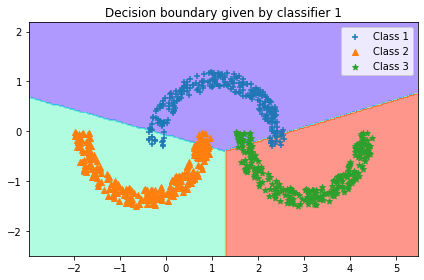

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 1')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c1_nl.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Classifier 2
C2: Full but equal covariance for all classes, $\Sigma$. Use the average of the sample covariance matrix from all classes in the train data as $\Sigma$.

In [ ]:
cov_class_1 = np.cov(nl_class_1_train.T)
cov_class_2 = np.cov(nl_class_2_train.T)
cov_class_3 = np.cov(nl_class_3_train.T)

cov_classifier_2 = (cov_class_1 + cov_class_2 + cov_class_3) / 3
print(f'Covariance matrix =\n{cov_classifier_2}')
cov_classifier_2 = [cov_classifier_2]*3

Covariance matrix =
[[0.85644205 0.00654905]
 [0.00654905 0.18270152]]


In [ ]:
#for non-linear data
pred_nl_classifier_2 = classifier(test_features_nl, means_nl, cov_classifier_2, priors_nl)

confusion_matrix_classifier_2 = confusion_mat(pred_nl_classifier_2, gt_nl)


performance_2 = performance(pred_nl_classifier_2, gt_nl)
print(f'Confusion matrix = \n{confusion_matrix_classifier_2}')
print(f'Classifier performance for non-linearly seperable dataset\nAccuracy = {performance_2[0]}\nPrecision = {performance_2[1]}\nRecall = {performance_2[2]}\nF-Score = {performance_2[3]}')


Confusion matrix = 
[[222  16  22]
 [ 14 234   0]
 [ 14   0 228]]
Classifier performance for non-linearly seperable dataset
Accuracy = 0.912
Precision = 0.9131811004245022
Recall = 0.912
F-Score = 0.9125901680588823


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_nl, cov_classifier_2, priors_nl))
mesh_z = mesh_z.reshape(mesh_x.shape)

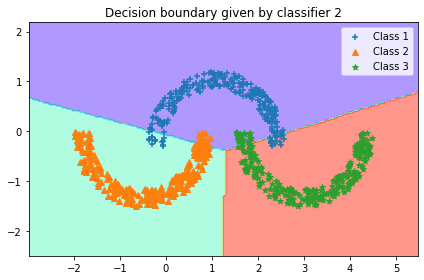

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 2')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c2_nl.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Classifier 3
C3: Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class.

In [ ]:
var_class_1 = np.var(nl_class_1_train, axis = 0, dtype = np.float64)
var_class_2 = np.var(nl_class_2_train, axis = 0, dtype = np.float64)
var_class_3 = np.var(nl_class_3_train, axis = 0, dtype = np.float64)

# avg_var = (var_class_1 + var_class_2 + var_class_3) / 3

cov_classifier_3 = [np.identity(2)* var_class_1, np.identity(2)* var_class_2, np.identity(2)* var_class_3]
print(f'Class 1 Covariance matrix =\n{cov_classifier_3[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_3[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_3[2]}\n')

Class 1 Covariance matrix =
[[0.87391892 0.        ]
 [0.         0.16234948]]

Class 2 Covariance matrix =
[[0.84256496 0.        ]
 [0.         0.19178134]]

Class 3 Covariance matrix =
[[0.84256496 0.        ]
 [0.         0.19178134]]



In [ ]:
#for non-linear data
pred_nl_classifier_3 = classifier(test_features_nl, means_nl, cov_classifier_3, priors_nl)

confusion_matrix_classifier_3 = confusion_mat(pred_l_classifier_3, gt_l)

performance_3 = performance(pred_nl_classifier_3, gt_nl)
print(f'Confusion matrix = \n{confusion_matrix_classifier_3}')
print(f'Classifier performance for non-linearly seperable dataset\nAccuracy = {performance_3[0]}\nPrecision = {performance_3[1]}\nRecall = {performance_3[2]}\nF-Score = {performance_3[3]}')


Confusion matrix = 
[[250   0   0]
 [  0 250   0]
 [  0   0 250]]
Classifier performance for non-linearly seperable dataset
Accuracy = 0.916
Precision = 0.9162345131289231
Recall = 0.9159999999999999
F-Score = 0.916117241556446


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_nl, cov_classifier_3, priors_nl))
mesh_z = mesh_z.reshape(mesh_x.shape)

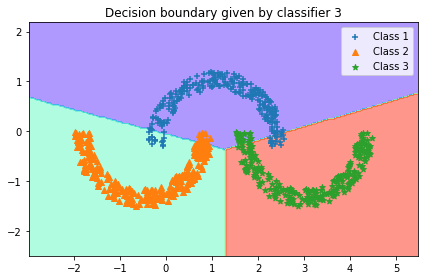

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 3')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c3_nl.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Classifier 4
C4: Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.

In [ ]:
cov_class_1 = np.cov(nl_class_1_train.T)
cov_class_2 = np.cov(nl_class_2_train.T)
cov_class_3 = np.cov(nl_class_3_train.T)
cov_classifier_4 = (cov_class_1, cov_class_2, cov_class_3)
print(f'Class 1 Covariance matrix =\n{cov_classifier_4[0]}\n')
print(f'Class 2 Covariance matrix =\n{cov_classifier_4[1]}\n')
print(f'Class 3 Covariance matrix =\n{cov_classifier_4[2]}\n')

Class 1 Covariance matrix =
[[ 0.87742863 -0.04154202]
 [-0.04154202  0.16300148]]

Class 2 Covariance matrix =
[[0.84594876 0.03059458]
 [0.03059458 0.19255154]]

Class 3 Covariance matrix =
[[0.84594876 0.03059458]
 [0.03059458 0.19255154]]



In [ ]:
#for non-linear data

pred_nl_classifier_4 = classifier(test_features_nl, means_nl, cov_classifier_4, priors_nl)

confusion_matrix_classifier_4 = confusion_mat(pred_nl_classifier_4, gt_nl)

performance_4 = performance(pred_nl_classifier_4, gt_nl)
print(f'Confusion matrix = \n{confusion_matrix_classifier_4}')
print(f'Classifier performance for non-linearly seperable dataset\nAccuracy = {performance_4[0]}\nPrecision = {performance_4[1]}\nRecall = {performance_4[2]}\nF-Score = {performance_4[3]}')


Confusion matrix = 
[[221   9  22]
 [ 17 241   0]
 [ 12   0 228]]
Classifier performance for non-linearly seperable dataset
Accuracy = 0.92
Precision = 0.9203642180386366
Recall = 0.9199999999999999
F-Score = 0.9201820729789578


In [ ]:
mesh_z = np.array(classifier(mesh_features, means_nl, cov_classifier_4, priors_nl))
mesh_z = mesh_z.reshape(mesh_x.shape)

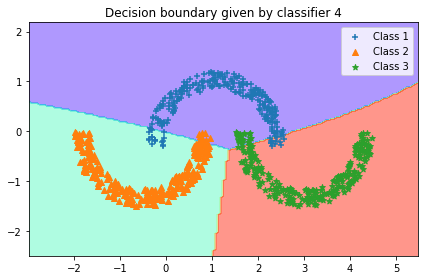

In [ ]:
plt.contourf(mesh_x, mesh_y, mesh_z, alpha = alpha, cmap = cmap)
plt.scatter(class_x1, class_y1, label = 'Class 1', marker = '+')
plt.scatter(class_x2, class_y2, label = 'Class 2', marker = '^')
plt.scatter(class_x3, class_y3, label = 'Class 3', marker = '*')
plt.title('Decision boundary given by classifier 4')
plt.legend()
plt.tight_layout(rect = [0, 0, 1, 1])
# figures.append('c4_nl.png')
# plt.savefig(figures[-1], dpi = 350, bbox = 'tight')

### Performance of classifier

Summary of the classifier performance

In [ ]:
print('Classifier', 'Acc.', 'Prec.', 'Recall', 'F-score', sep = '\t|')
print('C1\t', f'{performance_1[0]: .3f}', f'{performance_1[1]: .3f}', f'{performance_1[2]: .3f}', f'{performance_1[3]: .3f}', sep = '\t|')
print('C2\t', f'{performance_2[0]: .3f}', f'{performance_2[1]: .3f}', f'{performance_2[2]: .3f}', f'{performance_2[3]: .3f}', sep = '\t|')
print('C3\t', f'{performance_3[0]: .3f}', f'{performance_3[1]: .3f}', f'{performance_3[2]: .3f}', f'{performance_3[3]: .3f}', sep = '\t|')
print('C4\t', f'{performance_4[0]: .3f}', f'{performance_4[1]: .3f}', f'{performance_4[2]: .3f}', f'{performance_4[3]: .3f}', sep = '\t|')

Classifier	|Acc.	|Prec.	|Recall	|F-score
C1		| 0.912	| 0.913	| 0.912	| 0.913
C2		| 0.912	| 0.913	| 0.912	| 0.913
C3		| 0.916	| 0.916	| 0.916	| 0.916
C4		| 0.920	| 0.920	| 0.920	| 0.920


In [ ]:
# from google.colab import files
# for f in figures:
#   files.download(f)